In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/Users/ecuerbo/python/pyprac/data/coffee.csv')

In [2]:
df.columns

Index(['Unnamed: 0', 'total_cup_points', 'species', 'owner',
       'country_of_origin', 'farm_name', 'lot_number', 'mill', 'ico_number',
       'company', 'altitude', 'region', 'producer', 'number_of_bags',
       'bag_weight', 'in_country_partner', 'harvest_year', 'grading_date',
       'owner_1', 'variety', 'processing_method', 'aroma', 'flavor',
       'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup',
       'sweetness', 'cupper_points', 'moisture', 'category_one_defects',
       'quakers', 'color', 'category_two_defects', 'expiration',
       'certification_body', 'certification_address', 'certification_contact',
       'unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters',
       'altitude_mean_meters'],
      dtype='object')

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [82]:
df.describe()

,total_cup_points,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1337.000000,1338.000000,1108.000000,1108.000000,1108.000000
mean,82.151203,154.092676,7.572362,7.526046,7.406614,7.541338,7.523117,7.523632,9.842227,9.842459,9.864058,7.508984,0.088356,0.479821,0.173523,3.557549,1751.029843,1799.708197,1775.369020
std,2.686862,129.993747,0.315916,0.341382,0.350304,0.319173,0.307815,0.353630,0.485183,0.715296,0.554207,0.426843,0.048298,2.550603,0.832419,5.314357,8673.348986,8672.712024,8672.533233
min,59.830000,0.000000,5.080000,6.080000,6.170000,5.250000,5.080000,5.250000,6.000000,0.000000,1.330000,5.170000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,81.102500,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,82.500000,172.500000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,83.670000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,90.580000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [10]:
df.var()>10

total_cup_points        False
number_of_bags           True
aroma                   False
flavor                  False
aftertaste              False
acidity                 False
body                    False
balance                 False
uniformity              False
clean_cup               False
sweetness               False
cupper_points           False
moisture                False
category_one_defects    False
quakers                 False
category_two_defects     True
altitude_low_meters      True
altitude_high_meters     True
altitude_mean_meters     True
altitude_range           True
dtype: bool

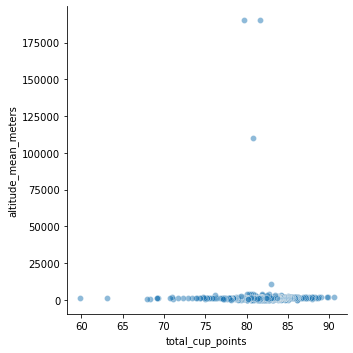

In [76]:
# high variation on the altitudes
sns.relplot(x='total_cup_points',y='altitude_mean_meters', data=df, kind='scatter',alpha=0.5);

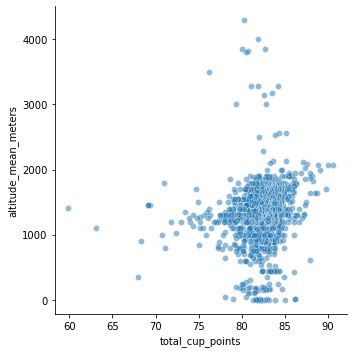

In [5]:
#outlying altitudes must have been in km. must be divided by 1000
'''low_alt_km=df.loc[df['altitude_low_meters']>10000, 'altitude_low_meters']
mean_alt_km=df.loc[df['altitude_mean_meters']>10000, 'altitude_mean_meters']
high_alt_km=df.loc[df['altitude_high_meters']>10000, 'altitude_high_meters']
low_alt_m = low_alt_km/1000
mean_alt_m = low_alt_km/1000
high_alt_m = high_alt_km/1000
df.loc[df['altitude_low_meters']>10000, 'altitude_low_meters'] = low_alt_m
df.loc[df['altitude_mean_meters']>10000, 'altitude_mean_meters'] = mean_alt_m
df.loc[df['altitude_high_meters']>10000, 'altitude_high_meters'] = mean_alt_m'''
#a shorter code
alts = ['altitude_mean_meters','altitude_low_meters','altitude_high_meters']
for alt in alts:
    km = df.loc[df[alt]>10000, alt]
    m = km/1000
    df.loc[df[alt]>10000, alt] = m
    
sns.relplot(x='total_cup_points',y='altitude_mean_meters', data=df, kind='scatter',alpha=0.5);

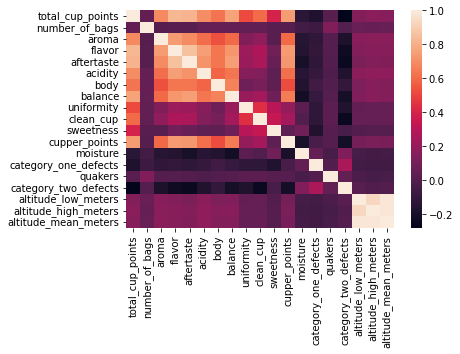

In [6]:
sns.heatmap(df.corr());

In [7]:
fl=[]
for x in df.columns:
    if df[x].dtype=='float':
        fl.append(x)

In [8]:
df['altitude_range'] = df['altitude_high_meters'] - df['altitude_low_meters']

In [9]:
df[df['altitude_range']>500].describe()

,total_cup_points,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters,altitude_range
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000
mean,81.838333,136.611111,7.504444,7.527778,7.397778,7.537222,7.551111,7.571111,9.888889,9.481111,9.888889,7.490000,0.083333,0.666667,0.0,2.222222,963.382222,1922.760000,1443.071111,959.377778
std,3.659886,126.794943,0.368674,0.445428,0.331796,0.407139,0.358147,0.453274,0.342618,1.510188,0.342618,0.494713,0.051335,1.644957,0.0,4.684839,405.966702,1028.756558,659.705432,839.912501
min,72.330000,1.000000,6.830000,6.750000,6.830000,6.750000,6.920000,6.670000,8.670000,5.330000,8.670000,6.420000,0.000000,0.000000,0.0,0.000000,100.000000,1250.000000,825.000000,518.160000
25%,80.982500,1.000000,7.330000,7.210000,7.190000,7.330000,7.420000,7.330000,10.000000,10.000000,10.000000,7.210000,0.045000,0.000000,0.0,0.000000,750.000000,1500.000000,1087.500000,600.000000
50%,82.170000,100.000000,7.420000,7.625000,7.375000,7.420000,7.500000,7.670000,10.000000,10.000000,10.000000,7.455000,0.100000,0.000000,0.0,1.000000,1050.000000,1800.000000,1387.940000,776.240000
75%,83.997500,268.750000,7.750000,7.750000,7.647500,7.750000,7.647500,7.897500,10.000000,10.000000,10.000000,7.730000,0.117500,1.000000,0.0,1.000000,1174.320000,1879.820000,1498.380000,800.000000
max,87.420000,300.000000,8.330000,8.250000,7.920000,8.500000,8.500000,8.420000,10.000000,10.000000,10.000000,8.330000,0.170000,7.000000,0.0,19.000000,1800.000000,5900.000000,3850.000000,4100.000000


In [13]:
df[fl]

,total_cup_points,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,300.0,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,0.12,0.0,0.0,0.0,1950.0,2200.0,2075.0
1,89.92,300.0,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,0.12,0.0,0.0,1.0,1950.0,2200.0,2075.0
2,89.75,5.0,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,0.00,0.0,0.0,0.0,1600.0,1800.0,1700.0
3,89.00,320.0,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,0.11,0.0,0.0,2.0,1800.0,2200.0,2000.0
4,88.83,300.0,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,0.12,0.0,0.0,2.0,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,78.75,1.0,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,0.00,0.0,0.0,1.0,NaN,NaN,NaN
1334,78.08,1.0,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,0.00,0.0,0.0,0.0,40.0,40.0,40.0
1335,77.17,1.0,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,0.00,0.0,0.0,6.0,795.0,795.0,795.0
1336,75.08,1.0,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,0.10,20.0,0.0,1.0,NaN,NaN,NaN


In [12]:
fl

['total_cup_points',
 'number_of_bags',
 'aroma',
 'flavor',
 'aftertaste',
 'acidity',
 'body',
 'balance',
 'uniformity',
 'clean_cup',
 'sweetness',
 'cupper_points',
 'moisture',
 'category_one_defects',
 'quakers',
 'category_two_defects',
 'altitude_low_meters',
 'altitude_high_meters',
 'altitude_mean_meters']